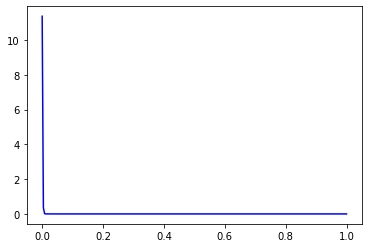

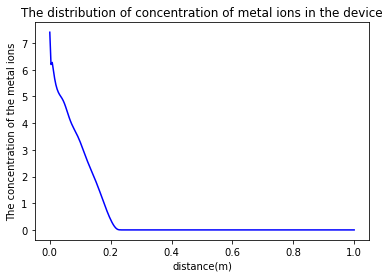

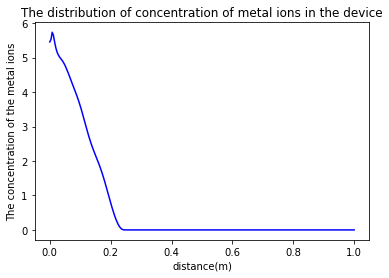

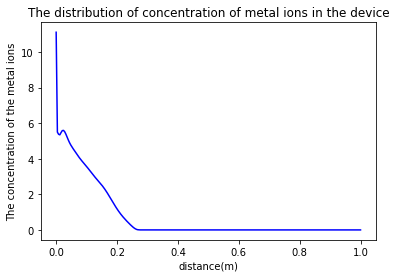

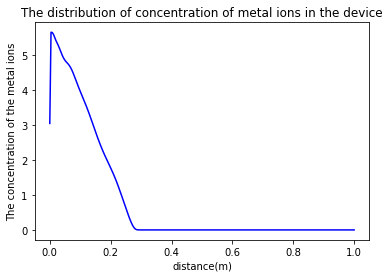

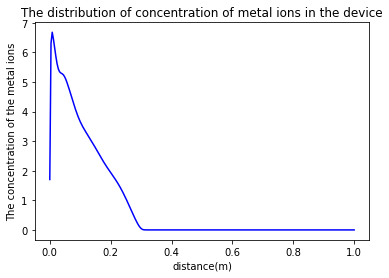

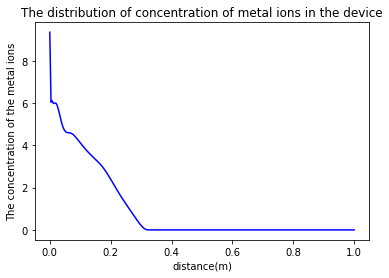

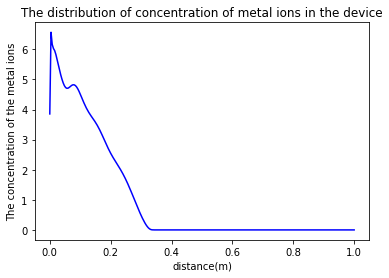

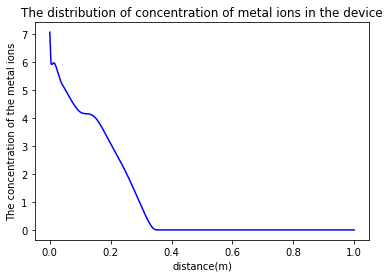

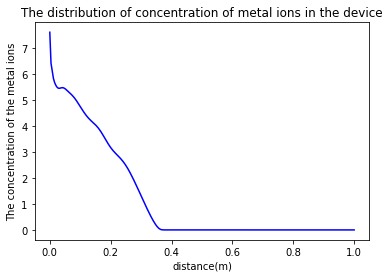

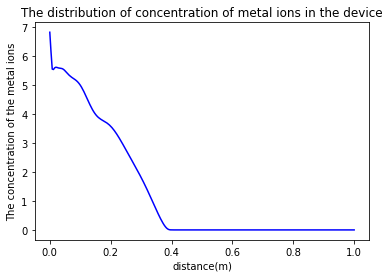

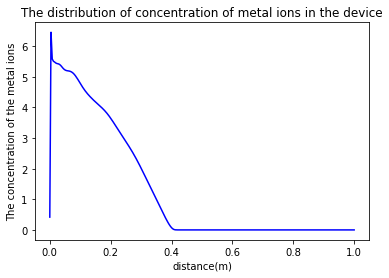

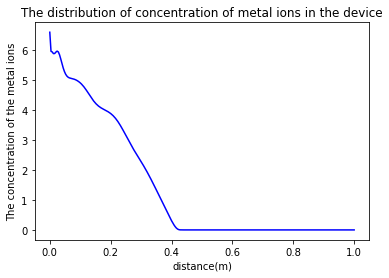

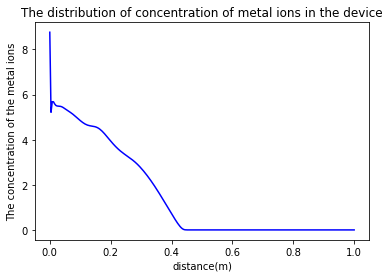

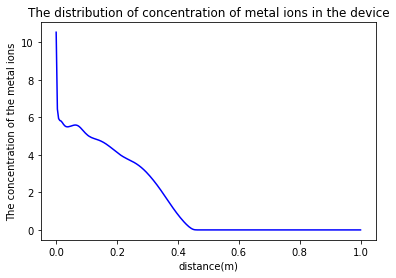

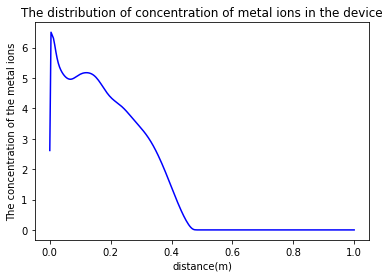

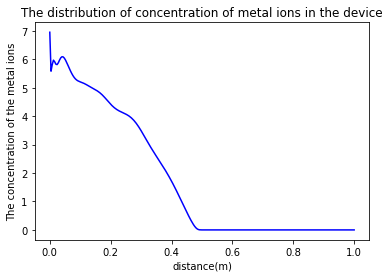

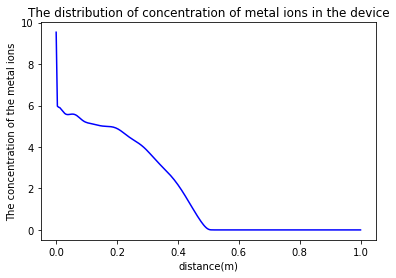

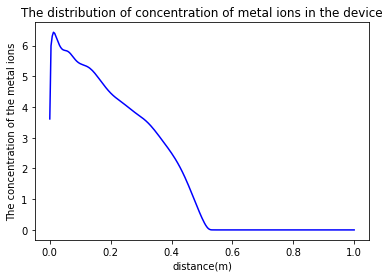

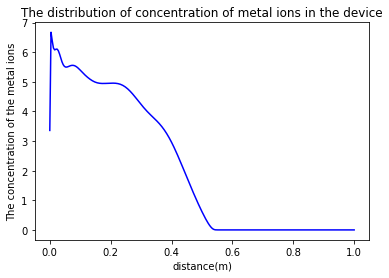

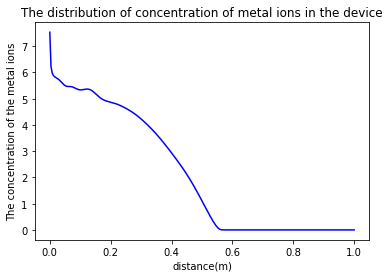

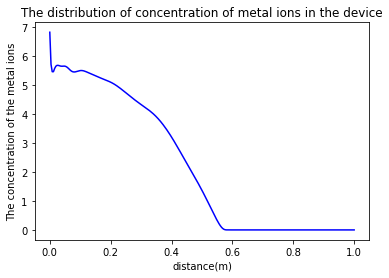

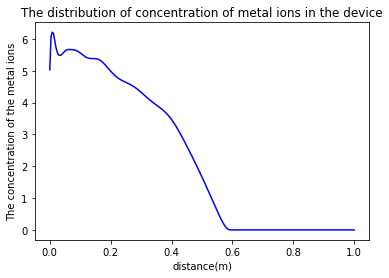

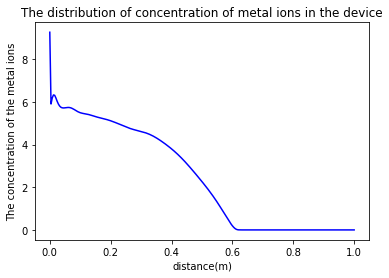

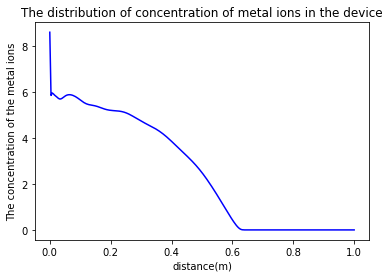

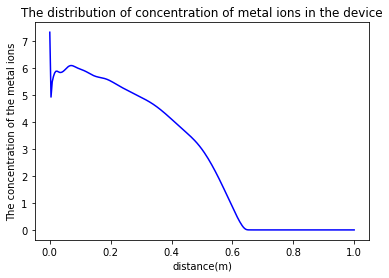

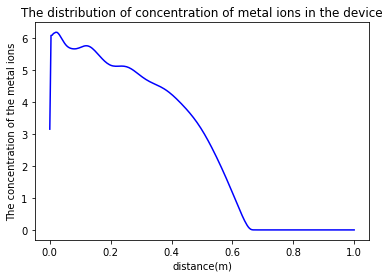

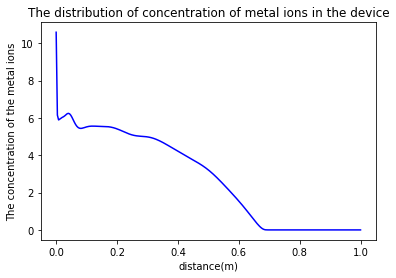

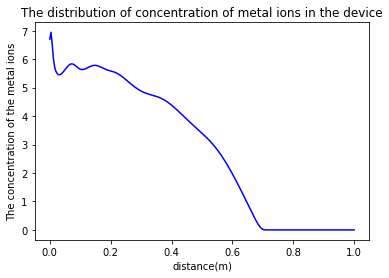

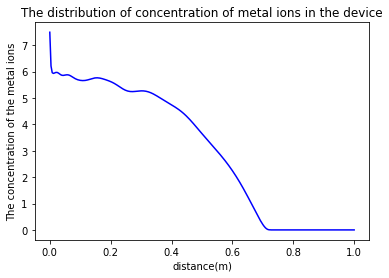

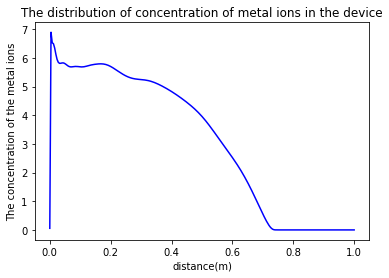

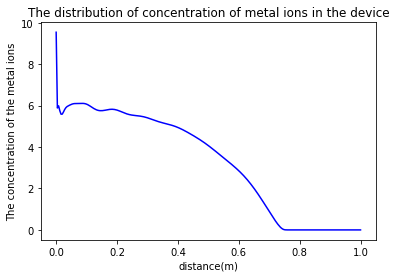

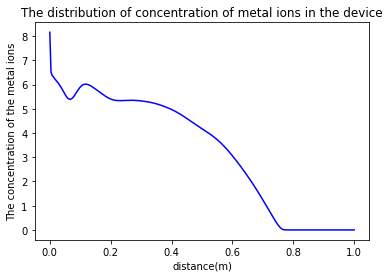

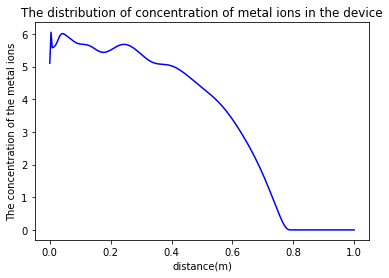

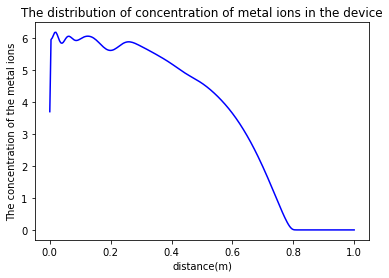

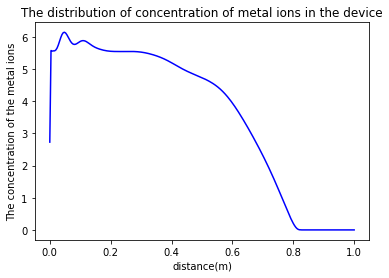

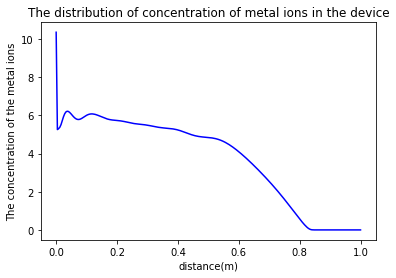

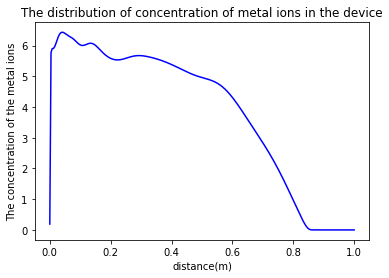

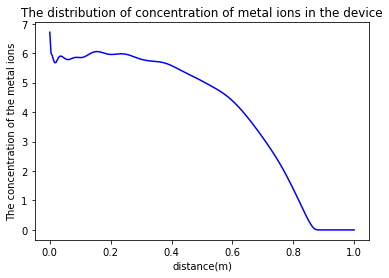

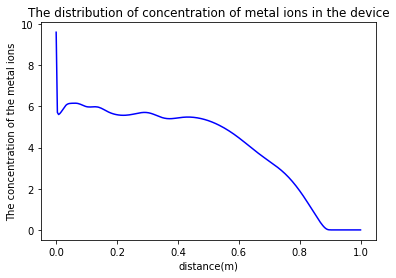

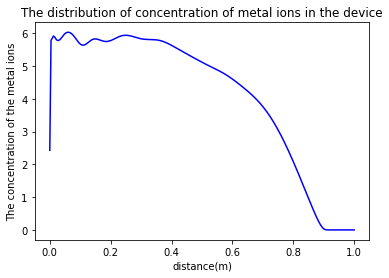

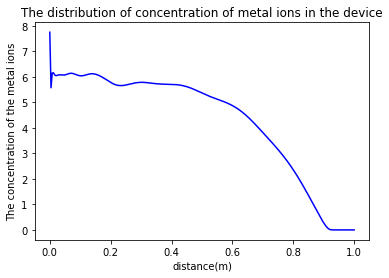

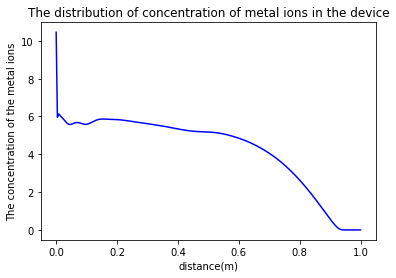

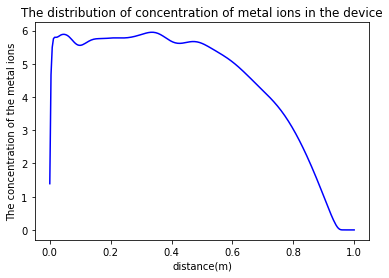

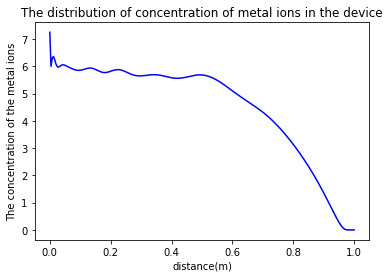

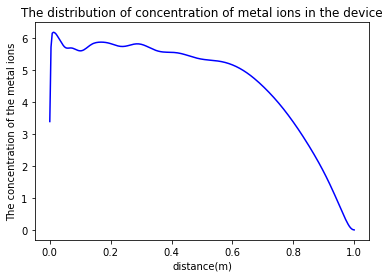

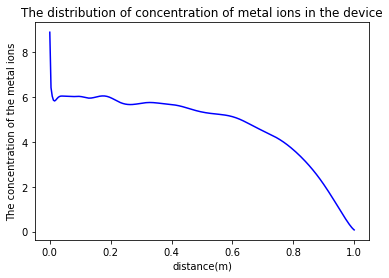

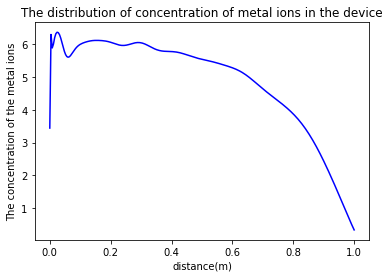

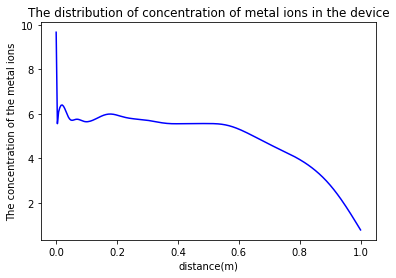

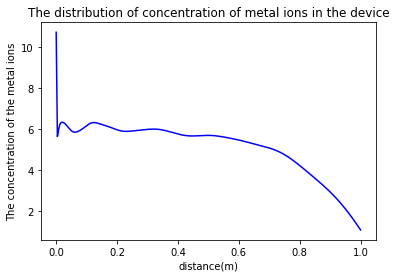

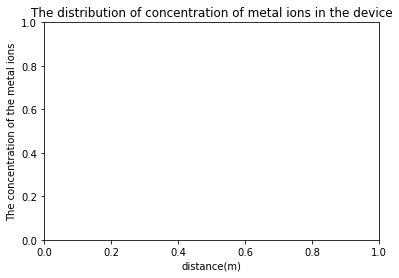

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## define function to generate random numbers
def r2():
    y = (6 + 6) *np.random.rand(1)
    return y

Lx = 1;#domain:-Lx < x < Lx   m 
Nx = 500;# of intervals
nx = Nx + 1;# of gridpoints in x
dx = 2*Lx/Nx;# grid length in x
#x = list(range(0,Nx))*dx;#x values on the grid
v= 10;# the speed of the water
kon = 0.006*60*60;   #uM/h
koff = 0.002*60*60;
Kd = koff/kon;
n =0.6391;
### time step parameters %%%%%
nsteps = 500000;#number of time steps
nouts = 10000;#plot every nout time steps
dt = (dx)**2;#borderline stability of FYCS
alpha = v*dt/dx;#equation parameter
#### Construct the matrix %%%%%%%%
u  = np.zeros((Nx+1));
u[0] = r2()
MBP = 550*np.ones((Nx+1));
z = np.zeros((Nx+1));
t =[];

plt.ion()
for j in range(0,nsteps):
    plt.ion()
    for i in range(1,Nx):
        temp = dt*((n*((u[i])**n)*MBP[i])/(Kd + (u[i])**n))
        temp1 = (1 - alpha)*u[i] + alpha*u[i - 1] - dt*((n*((u[i])**n)*MBP[i])/(Kd + (u[i])**n))
        MBP[i] = MBP[i] -temp
        z[i] = z[i] + temp
        u[i] = temp1
        u[0] = r2()
        i=i+1
    
        if MBP[i] <= 0:
            MBP[i] =0
        
        if u[i] <= 0:
            u[i] = 0
        
    if j%nouts==0 and u[251] <= 4:
        
        plt.plot(np.linspace(0,1,251),u[0:251],'b');
        
        plt.ioff
        plt.show()
        plt.pause(0.1)
        plt.title("The distribution of concentration of metal ions in the device");
        plt.xlabel("distance(m)");
        plt.ylabel("The concentration of the metal ions");

        
    elif u[251] > 4:
             t = [t, j];
        
    j = j+1
    

    

    


